In [1]:
%matplotlib inline
import os
import math
import operator
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def gauss(A, b, pivoting=False):
    cA = np.copy(A)
    cb = np.copy(b)
    n = np.shape(A)[0]
    x = np.zeros(n, dtype=np.float)
    p = np.array(range(n))
    
    # прямой ход
    for k in range(n-1):
        # выбор главного элемента
        if pivoting == True:
            index = np.argmax(np.absolute(cA[k:n][:,k:n]))
            i = k + index // (n-k)
            j = k + index % (n-k)

            p[k], p[j] = p[j], p[k]
            
            cA[:,k], cA[:,j] = cA[:,j], cA[:,k].copy()
            cA[k], cA[i] = cA[i], cA[k].copy()
            cb[k], cb[i] = cb[i], cb[k]
        
        for i in range(k+1, n):
            tmp_a = cA[i][k]           
            for j in range(k, n):
                cA[i][j] -= (tmp_a*cA[k][j]) / cA[k][k]            
            cb[i] -= (tmp_a*cb[k]) / cA[k][k]
    
    # обратный ход
    for i in range(n-1, -1, -1):
        for j in range(i+1, n):
            x[i] += cA[i][j]*x[j]
        x[i] = (cb[i]-x[i]) / cA[i][i]
    
    # сортировка вектора решения
    if pivoting == True:
        d = {p[i]: x[i] for i in range(n)}
        x = np.array(sorted(d.items(), key=operator.itemgetter(0)))[:,1]
    
    return x

In [3]:
def thomas(A, b):
    n = np.shape(A)[0]
    x = np.zeros(n, dtype=np.float)
    Gamma = np.zeros(n, dtype=np.float)
    Betta = np.zeros(n, dtype=np.float)
   
    Gamma[0] = 0
    Betta[0] = 0

    for i in range(n-1):
        Gamma[i+1] = -A[i][i+1] / (A[i][i-1]*Gamma[i] + A[i][i])
        Betta[i+1] = (b[i] - A[i][i-1]*Betta[i]) / (A[i][i-1]*Gamma[i] + A[i][i])
        
    x[n-1] = (b[n-1] - A[n-1][n-2]*Betta[n-1]) / (A[n-1][n-1] + A[n-1][n-2]*Gamma[n-1])   
    for i in range(n-1, 0, -1):
        x[i-1] = Gamma[i]*x[i] + Betta[i]
    
    return x

In [4]:
def cholesky(A, b):
    n = np.shape(A)[0]
    x = np.zeros(n, dtype=np.float)
    y = np.zeros(n, dtype=np.float)
    L = np.zeros((n, n), dtype=np.float)
    
    for i in range(n):
        s = 0
        for k in range(i):
             s += L[i][k]**2
        L[i][i] = math.sqrt(A[i][i] - s)
               
        for j in range(i+1, n):
            s = 0
            for k in range(j):
                s += L[i][k]*L[j][k]
            L[j][i] = (A[j][i] - s) / L[i][i]
            
    for i in range(n):
        for j in range(i):
            y[i] += L[i][j]*y[j]
        y[i] = (b[i]-y[i]) / L[i][i]
    
    L = np.transpose(L)
    for i in range(n-1, -1, -1):
        for j in range(i+1, n):    
            x[i] += L[i][j]*x[j]
        x[i] = (y[i]-x[i]) / L[i][i]

    return x

In [5]:
def generator(n, type="general"):   
    if type == "general":
        while True:
            A = np.random.uniform(-1, 1, (n, n))
            if np.linalg.det(A) != 0:
                break
                
    elif type == "predominance":
        A = np.diag(np.random.uniform(0.6, 1, (n)), k=0)
        A *= np.diag(np.random.choice([-1, 1], (n)), k=0)
        
        for i in range(n):
            while True:
                row = np.random.uniform(-0.6, 0.6, (n-1))
                if abs(A[i][i]) > np.sum(np.abs(row)):
                    break
                
            for j in range(i):
                A[i][j] = row[j]
            for j in range(i, n-1):
                A[i][j+1] = row[j]
                
    elif type == "tridiagonal":
        A = np.diag(np.random.uniform(-1, 1, (n)), k=0)
        A += np.diag(np.random.uniform(-1, 1, (n-1)), k=1)
        A += np.diag(np.random.uniform(-1, 1, (n-1)), k=-1)
                            
    elif type == "positive":
        A = np.triu(np.random.uniform(-0.5, 0.5, (n, n)))
        A = A @ np.transpose(A)
        
    return A

In [6]:
def check(x1, x2):
    print(np.allclose(x1, x2))
    
eps = 1e-16
correct = lambda e: e if e >= eps else np.NaN 

In [7]:
count = 10000
n = 4

b = np.array([1 for i in range(n)], dtype=np.float)

Ro = np.zeros((count, 20))
K = np.zeros((count, 20))
E2 = np.zeros((count, 20))
Ep = np.zeros((count, 20))
D = np.zeros((count, 20))

In [8]:
try:
    os.mkdir('general') 
except OSError as error:
    print(error)
    
try:
     os.mkdir('predominance')
except OSError as error:
    print(error)

try:
    os.mkdir('tridiagonal') 
except OSError as error:
    print(error)
    
try:
     os.mkdir('positive')
except OSError as error:
    print(error)

[WinError 183] Невозможно создать файл, так как он уже существует: 'general'
[WinError 183] Невозможно создать файл, так как он уже существует: 'predominance'
[WinError 183] Невозможно создать файл, так как он уже существует: 'tridiagonal'
[WinError 183] Невозможно создать файл, так как он уже существует: 'positive'


### Анализ матриц общего вида

In [9]:
for i in range(count):
    A = generator(n, "general")
    
    x0 = gauss(A, b, True)
    x1 = gauss(A, b, False)
    
    Ro[i][0] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][0] = np.linalg.cond(A)
    E2[i][0] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][0] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][0] = Ro[i][0] / np.min(np.abs(np.linalg.eigvals(A)))


In [10]:
def generator_general(n, a, b):
    while True:
        A = np.random.uniform(a, b, (n, n))
        if np.linalg.det(A) != 0:
            break
    return A

In [11]:
for i in range(count):
    A = generator_general(n, 3, 5)
    
    x0 = gauss(A, b, True)
    x1 = gauss(A, b, False)
    
    Ro[i][1] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][1] = np.linalg.cond(A)
    E2[i][1] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][1] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][1] = Ro[i][1] / np.min(np.abs(np.linalg.eigvals(A)))


In [12]:
for i in range(count):
    A = generator_general(n, -5, -3)
    
    x0 = gauss(A, b, True)
    x1 = gauss(A, b, False)
    
    Ro[i][2] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][2] = np.linalg.cond(A)
    E2[i][2] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][2] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][2] = Ro[i][2] / np.min(np.abs(np.linalg.eigvals(A)))

In [13]:
for i in range(count):
    A = generator_general(n, -4, 4)
    
    x0 = gauss(A, b, True)
    x1 = gauss(A, b, False)
    
    Ro[i][3] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][3] = np.linalg.cond(A)
    E2[i][3] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][3] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][3] = Ro[i][3] / np.min(np.abs(np.linalg.eigvals(A)))

In [14]:
for i in range(count):
    A = generator_general(n, -0.25, 0.25)
    
    x0 = gauss(A, b, True)
    x1 = gauss(A, b, False)
    
    Ro[i][4] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][4] = np.linalg.cond(A)
    E2[i][4] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][4] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][4] = Ro[i][4] / np.min(np.abs(np.linalg.eigvals(A)))

In [15]:
data = pd.DataFrame({'Ro': Ro[:,0], 'Log_K': np.log(K[:,0]), 'Log_E2': np.log(E2[:,0]), 'Log_Ep': np.log(Ep[:,0])})

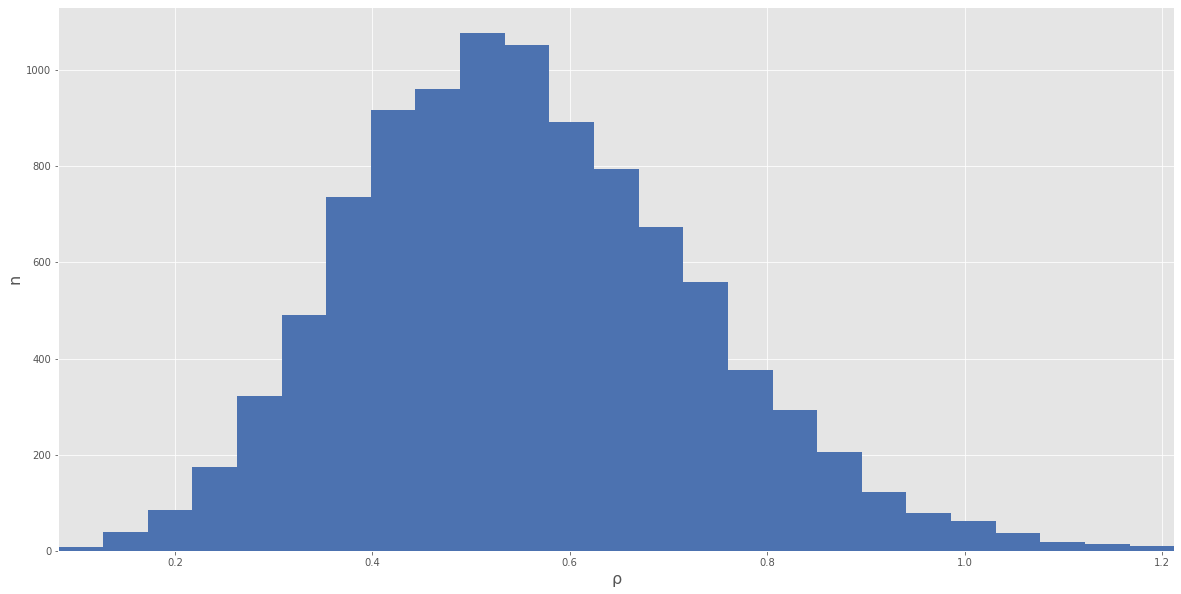

In [69]:
# Распределение спектральных радиусов
matplotlib.style.use('seaborn-deep')
plt.figure(figsize=(20,10))
plt.xlabel(chr(961), fontsize=16)
plt.ylabel('n', fontsize=16)
plt.xlim(data['Ro'].min(), data['Ro'].max())
plt.hist(data['Ro'], bins=25)
plt.savefig('./general/Plot_Ro')
plt.show()

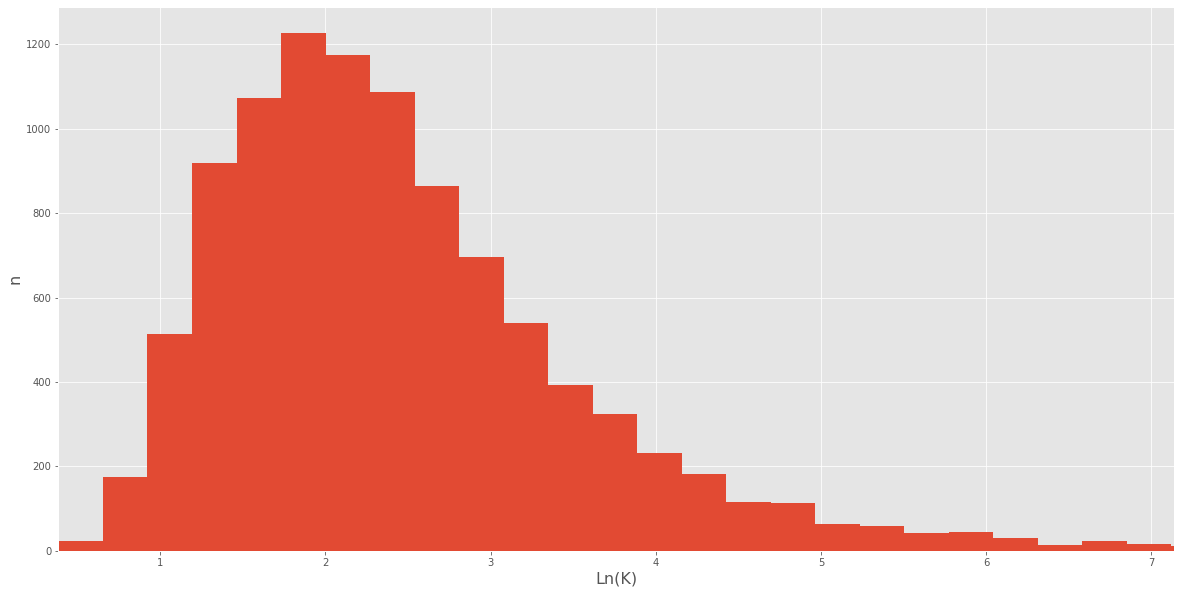

In [17]:
# Распределение чисел обусловленности
matplotlib.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.xlabel('Ln(K)', fontsize=16)
plt.ylabel('n', fontsize=16)
plt.xlim(data['Log_K'].min(), data['Log_K'].quantile(0.995))
plt.hist(data['Log_K'], bins=50)
plt.savefig('./general/Plot_K')
plt.show()

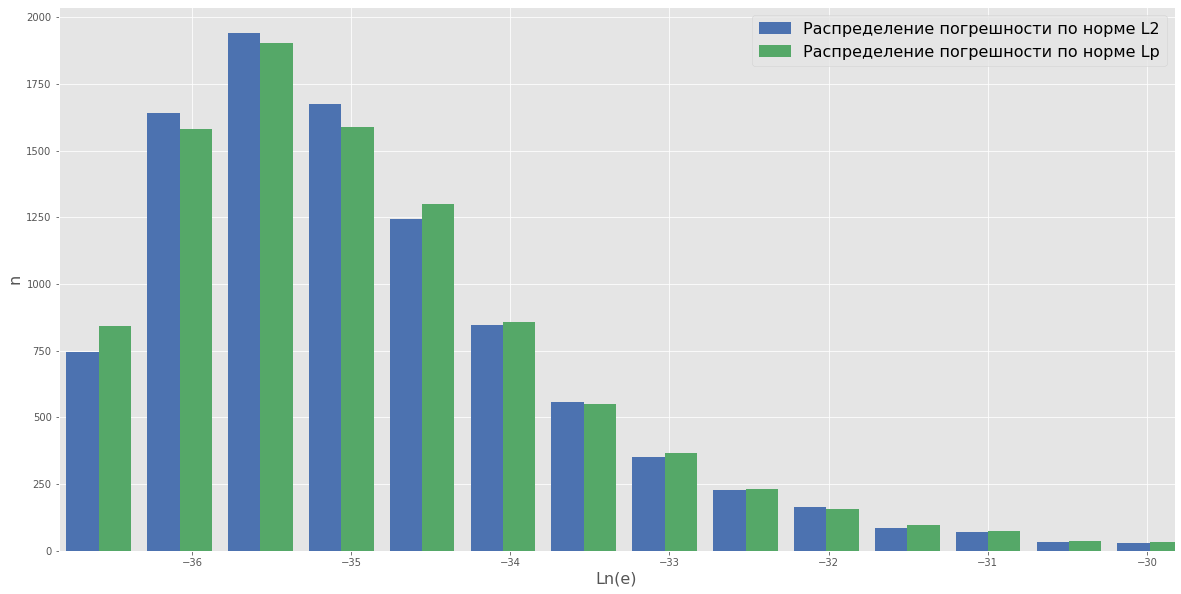

In [18]:
# Распределение погрешностей по среднеквадратичной и супремум-норме
matplotlib.style.use('seaborn-deep')
plt.figure(figsize=(20,10))
plt.xlabel('Ln(e)', fontsize=16)
plt.ylabel('n', fontsize=16)
plt.xlim(data['Log_Ep'].min(), data['Log_Ep'].quantile(0.995))
plt.hist((data['Log_E2'], data['Log_Ep']), bins=30, label = ('Распределение погрешности по норме L2',
                                                             'Распределение погрешности по норме Lp'))                                                   
plt.legend(loc='upper right', fontsize=16)
plt.savefig('./general/Plot_E')
plt.show()

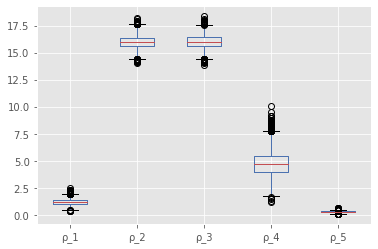

In [19]:
# диаграмма размаха спектрального радиуса для матриц общего вида
data_Ro = pd.DataFrame({chr(961)+'_1': Ro[:,0], 
                        chr(961)+'_2': Ro[:,1], 
                        chr(961)+'_3': Ro[:,2], 
                        chr(961)+'_4': Ro[:,3], 
                        chr(961)+'_5': Ro[:,4]})

ax = data_Ro.boxplot(column=[chr(961)+'_1', 
                             chr(961)+'_2', 
                             chr(961)+'_3', 
                             chr(961)+'_4', 
                             chr(961)+'_5'])

ax.get_figure().suptitle('')
plt.savefig('./general/BoxPlot_Ro')
plt.show()

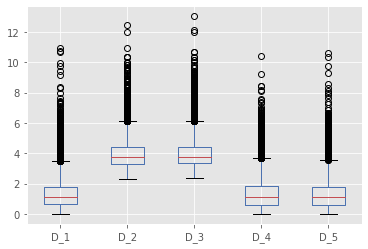

In [20]:
# диаграмма размаха отношения максмального по модулю собственного числа к минимальному для матриц общего вида
data_D = pd.DataFrame({'D_1': np.log(D[:,0]), 
                       'D_2': np.log(D[:,1]), 
                       'D_3': np.log(D[:,2]),
                       'D_4': np.log(D[:,3]), 
                       'D_5': np.log(D[:,4])})

ax = data_D.boxplot(column=['D_1', 
                            'D_2', 
                            'D_3', 
                            'D_4', 
                            'D_5'])

ax.get_figure().suptitle('')
plt.savefig('./general/BoxPlot_D')
plt.show()

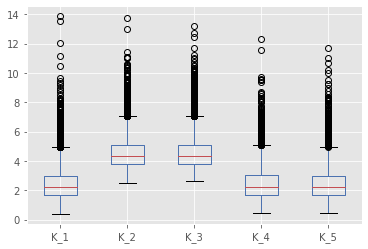

In [21]:
# диаграмма размаха числа обусловленности для матриц общего вида
data_K = pd.DataFrame({'K_1': np.log(K[:,0]),
                       'K_2': np.log(K[:,1]), 
                       'K_3': np.log(K[:,2]),
                       'K_4': np.log(K[:,3]),
                       'K_5': np.log(K[:,4])})

ax = data_K.boxplot(column=['K_1',
                            'K_2', 
                            'K_3', 
                            'K_4',
                            'K_5'])

ax.get_figure().suptitle('')
plt.savefig('./general/BoxPlot_K')
plt.show()

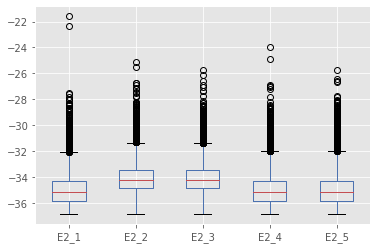

In [22]:
# диаграмма размаха погрешности метода Гаусса (классического) по норме L2 для матриц общего вида
data_E2 = pd.DataFrame({'E2_1': np.log(E2[:,0]),
                        'E2_2': np.log(E2[:,1]), 
                        'E2_3': np.log(E2[:,2]), 
                        'E2_4': np.log(E2[:,3]), 
                        'E2_5': np.log(E2[:,4])})

ax = data_E2.boxplot(column=['E2_1', 
                             'E2_2', 
                             'E2_3', 
                             'E2_4', 
                             'E2_5'])

ax.get_figure().suptitle('')
plt.savefig('./general/BoxPlot_E2')
plt.show()

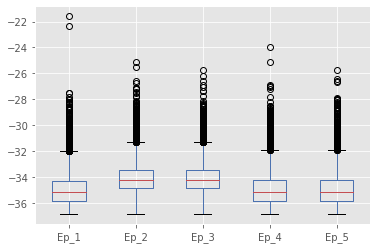

In [23]:
# диаграмма размаха погрешности метода Гаусса (классического) по норме Lp для матриц общего вида
data_Ep = pd.DataFrame({'Ep_1': np.log(Ep[:,0]),
                        'Ep_2': np.log(Ep[:,1]), 
                        'Ep_3': np.log(Ep[:,2]), 
                        'Ep_4': np.log(Ep[:,3]), 
                        'Ep_5': np.log(Ep[:,4])})

ax = data_Ep.boxplot(column=['Ep_1', 
                             'Ep_2', 
                             'Ep_3', 
                             'Ep_4', 
                             'Ep_5'])

ax.get_figure().suptitle('')
plt.savefig('./general/BoxPlot_Ep')
plt.show()

### Анализ матриц со строгим диагональным преобладанием

In [24]:
for i in range(count):
    A = generator(n, "predominance")
    
    x0 = gauss(A, b, True)
    x1 = gauss(A, b, False)
    
    Ro[i][5] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][5] = np.linalg.cond(A)
    E2[i][5] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][5] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][5] = Ro[i][5] / np.min(np.abs(np.linalg.eigvals(A)))

In [25]:
def generator_predominance(n, a, b, c):   
    A = np.diag(np.random.uniform(a+c, b+c, (n)), k=0)
    A *= np.diag(np.random.choice([-1, 1], (n)), k=0)
        
    for i in range(n):
        while True:
            row = np.random.uniform(-(a+c), a+c, (n-1))
            if abs(A[i][i]) > np.sum(np.abs(row)):
                break
                
        for j in range(i):
            A[i][j] = row[j]
        for j in range(i, n-1):
            A[i][j+1] = row[j]
    return A

In [26]:
for i in range(count):
    A = generator_predominance(n, 0.6, 1, 4)
    
    x0 = gauss(A, b, True)
    x1 = gauss(A, b, False)
    
    Ro[i][6] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][6] = np.linalg.cond(A)
    E2[i][6] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][6] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][6] = Ro[i][6] / np.min(np.abs(np.linalg.eigvals(A)))

In [27]:
for i in range(count):
    A = generator_predominance(n, 0.6, 1, -4)
    
    x0 = gauss(A, b, True)
    x1 = gauss(A, b, False)
    
    Ro[i][7] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][7] = np.linalg.cond(A)
    E2[i][7] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][7] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][7] = Ro[i][7] / np.min(np.abs(np.linalg.eigvals(A)))

In [28]:
for i in range(count):
    A = generator_predominance(n, 0.6*4, 1*4, 0)
    
    x0 = gauss(A, b, True)
    x1 = gauss(A, b, False)
    
    Ro[i][8] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][8] = np.linalg.cond(A)
    E2[i][8] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][8] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][8] = Ro[i][8] / np.min(np.abs(np.linalg.eigvals(A)))

In [29]:
for i in range(count):
    A = generator_predominance(n, 0.6/4, 1/4, 0)
    
    x0 = gauss(A, b, True)
    x1 = gauss(A, b, False)
    
    Ro[i][9] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][9] = np.linalg.cond(A)
    E2[i][9] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][9] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][9] = Ro[i][9] / np.min(np.abs(np.linalg.eigvals(A)))

In [30]:
data = pd.DataFrame({'Ro': Ro[:,5], 'Log_K': np.log(K[:,5]), 'Log_E2': np.log(E2[:,5]), 'Log_Ep': np.log(Ep[:,5])})

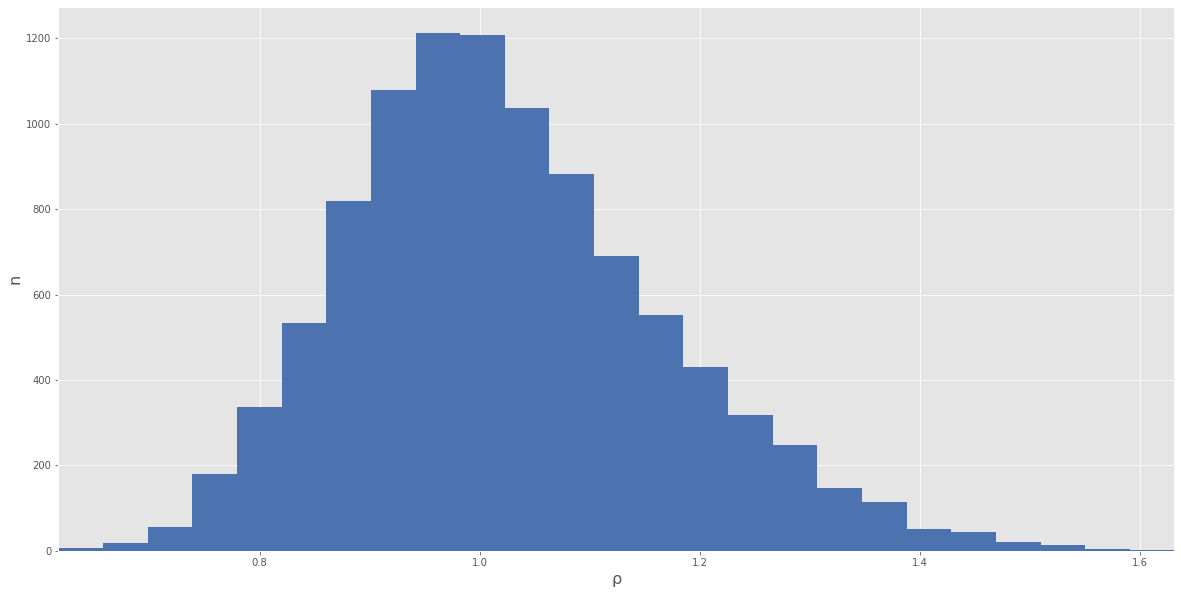

In [31]:
# Распределение спектральных радиусов
matplotlib.style.use('seaborn-deep')
plt.figure(figsize=(20,10))
plt.xlabel(chr(961), fontsize=16)
plt.ylabel('n', fontsize=16)
plt.xlim(data['Ro'].min(), data['Ro'].max())
plt.hist(data['Ro'], bins=25)
plt.savefig('./predominance/Plot_Ro')
plt.show()

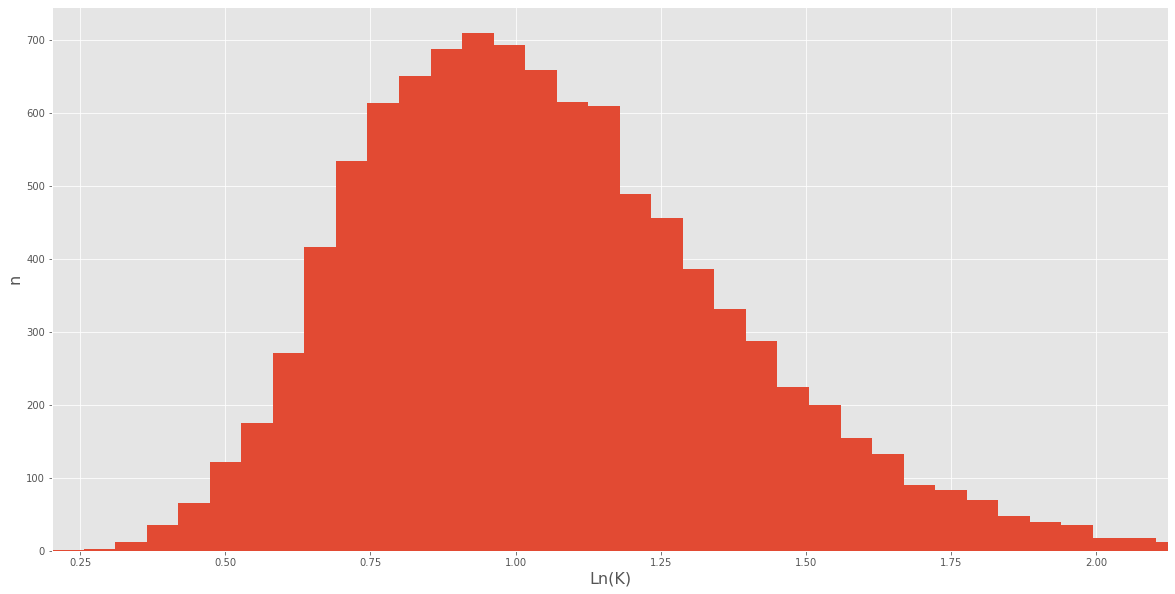

In [32]:
# Распределение чисел обусловленности
matplotlib.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.xlabel('Ln(K)', fontsize=16)
plt.ylabel('n', fontsize=16)
plt.xlim(data['Log_K'].min(), data['Log_K'].quantile(0.995))
plt.hist(data['Log_K'], bins=50)
plt.savefig('./predominance/Plot_K')
plt.show()

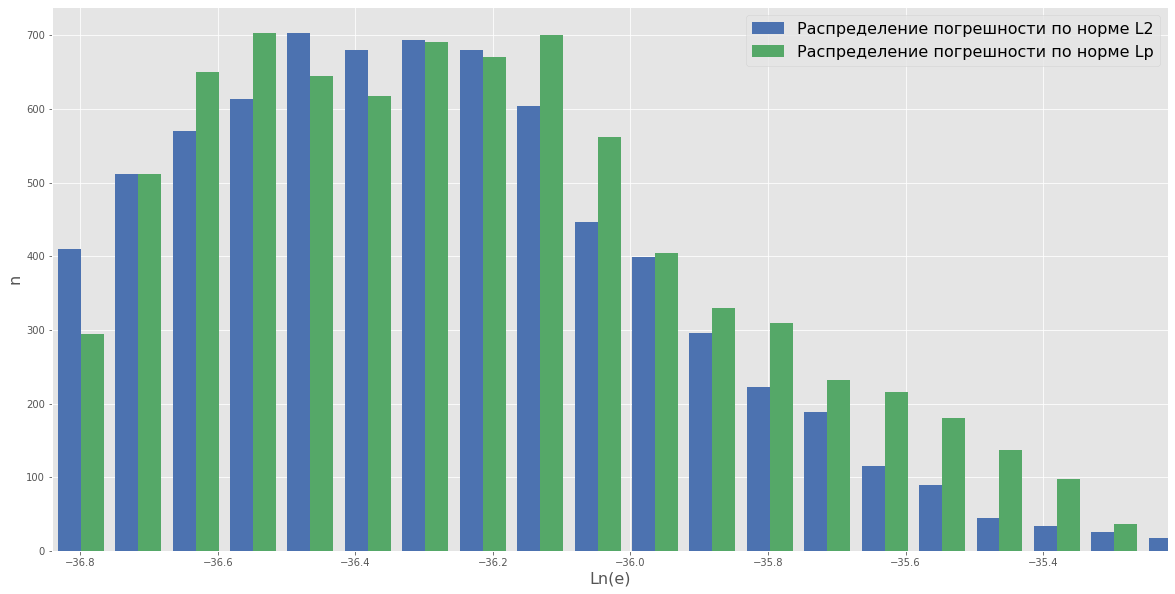

In [33]:
# Распределение погрешностей по среднеквадратичной и супремум-норме
matplotlib.style.use('seaborn-deep')
plt.figure(figsize=(20,10))
plt.xlabel('Ln(e)', fontsize=16)
plt.ylabel('n', fontsize=16)
plt.xlim(data['Log_Ep'].min(), data['Log_Ep'].quantile(0.995))
plt.hist((data['Log_E2'], data['Log_Ep']), bins=30, label = ('Распределение погрешности по норме L2',
                                                             'Распределение погрешности по норме Lp'))                                                  
plt.legend(loc='upper right', fontsize=16)
plt.savefig('./predominance/Plot_E')
plt.show()

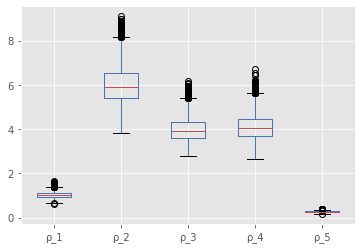

In [34]:
# диаграмма размаха спектрального радиуса для матриц общего вида
data_Ro = pd.DataFrame({chr(961)+'_1': Ro[:,5], 
                        chr(961)+'_2': Ro[:,6], 
                        chr(961)+'_3': Ro[:,7], 
                        chr(961)+'_4': Ro[:,8], 
                        chr(961)+'_5': Ro[:,9]})

ax = data_Ro.boxplot(column=[chr(961)+'_1', 
                             chr(961)+'_2', 
                             chr(961)+'_3', 
                             chr(961)+'_4', 
                             chr(961)+'_5'])

ax.get_figure().suptitle('')
plt.savefig('./predominance/BoxPlot_Ro')
plt.show()

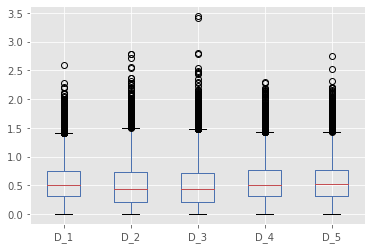

In [35]:
# диаграмма размаха отношения максмального по модулю собственного числа к минимальному для матриц общего вида
data_D = pd.DataFrame({'D_1': np.log(D[:,5]), 
                       'D_2': np.log(D[:,6]), 
                       'D_3': np.log(D[:,7]),
                       'D_4': np.log(D[:,8]), 
                       'D_5': np.log(D[:,9])})

ax = data_D.boxplot(column=['D_1', 
                            'D_2', 
                            'D_3', 
                            'D_4', 
                            'D_5'])

ax.get_figure().suptitle('')
plt.savefig('./predominance/BoxPlot_D')
plt.show()

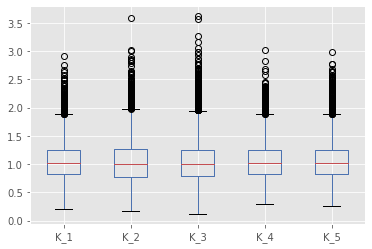

In [36]:
# диаграмма размаха числа обусловленности для матриц общего вида
data_K = pd.DataFrame({'K_1': np.log(K[:,5]),
                       'K_2': np.log(K[:,6]), 
                       'K_3': np.log(K[:,7]),
                       'K_4': np.log(K[:,8]),
                       'K_5': np.log(K[:,9])})

ax = data_K.boxplot(column=['K_1',
                            'K_2', 
                            'K_3', 
                            'K_4',
                            'K_5'])

ax.get_figure().suptitle('')
plt.savefig('./predominance/BoxPlot_K')
plt.show()

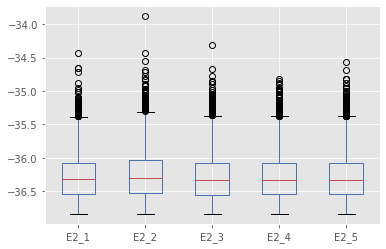

In [37]:
# диаграмма размаха погрешности метода Гаусса (классического) по норме L2 для матриц общего вида
data_E2 = pd.DataFrame({'E2_1': np.log(E2[:,5]),
                        'E2_2': np.log(E2[:,6]), 
                        'E2_3': np.log(E2[:,7]), 
                        'E2_4': np.log(E2[:,8]), 
                        'E2_5': np.log(E2[:,9])})

ax = data_E2.boxplot(column=['E2_1', 
                             'E2_2', 
                             'E2_3', 
                             'E2_4', 
                             'E2_5'])

ax.get_figure().suptitle('')
plt.savefig('./predominance/BoxPlot_E2')
plt.show()

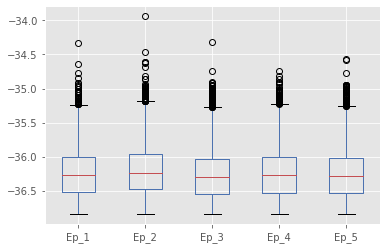

In [38]:
# диаграмма размаха погрешности метода Гаусса (классического) по норме Lp для матриц общего вида
data_Ep = pd.DataFrame({'Ep_1': np.log(Ep[:,5]),
                        'Ep_2': np.log(Ep[:,6]), 
                        'Ep_3': np.log(Ep[:,7]), 
                        'Ep_4': np.log(Ep[:,8]), 
                        'Ep_5': np.log(Ep[:,9])})

ax = data_Ep.boxplot(column=['Ep_1', 
                             'Ep_2', 
                             'Ep_3', 
                             'Ep_4', 
                             'Ep_5'])

ax.get_figure().suptitle('')
plt.savefig('./predominance/BoxPlot_Ep')
plt.show()

### Анализ трёхдиагональных матриц

In [39]:
for i in range(count):
    A = generator(n, "tridiagonal")
    
    x0 = gauss(A, b, True)
    x1 = thomas(A, b)
    
    Ro[i][10] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][10] = np.linalg.cond(A)
    E2[i][10] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][10] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][10] = Ro[i][10] / np.min(np.abs(np.linalg.eigvals(A)))

In [40]:
def generator_tridiagonal(n, a, b):   
    A = np.diag(np.random.uniform(-1, 1, (n)), k=0)
    A += np.diag(np.random.uniform(-1, 1, (n-1)), k=1)
    A += np.diag(np.random.uniform(-1, 1, (n-1)), k=-1)
    
    return A

In [41]:
for i in range(count):
    A = generator_tridiagonal(n, 3, 5)
    
    x0 = gauss(A, b, True)
    x1 = thomas(A, b)
    
    Ro[i][11] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][11] = np.linalg.cond(A)
    E2[i][11] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][11] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][11] = Ro[i][11] / np.min(np.abs(np.linalg.eigvals(A)))

In [42]:
for i in range(count):
    A = generator_tridiagonal(n, -5, -3)
    
    x0 = gauss(A, b, True)
    x1 = thomas(A, b)
    
    Ro[i][12] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][12] = np.linalg.cond(A)
    E2[i][12] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][12] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][12] = Ro[i][12] / np.min(np.abs(np.linalg.eigvals(A)))

In [43]:
for i in range(count):
    A = generator_tridiagonal(n, -4, 4)
    
    x0 = gauss(A, b, True)
    x1 = thomas(A, b)
    
    Ro[i][13] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][13] = np.linalg.cond(A)
    E2[i][13] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][13] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][13] = Ro[i][13] / np.min(np.abs(np.linalg.eigvals(A)))

In [44]:
for i in range(count):
    A = generator_tridiagonal(n, -0.25, 0.25)
    
    x0 = gauss(A, b, True)
    x1 = thomas(A, b)
    
    Ro[i][14] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][14] = np.linalg.cond(A)
    E2[i][14] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][14] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][14] = Ro[i][14] / np.min(np.abs(np.linalg.eigvals(A)))

In [45]:
data = pd.DataFrame({'Ro': Ro[:,10], 'Log_K': np.log(K[:,10]), 'Log_E2': np.log(E2[:,10]), 'Log_Ep': np.log(Ep[:,10])})

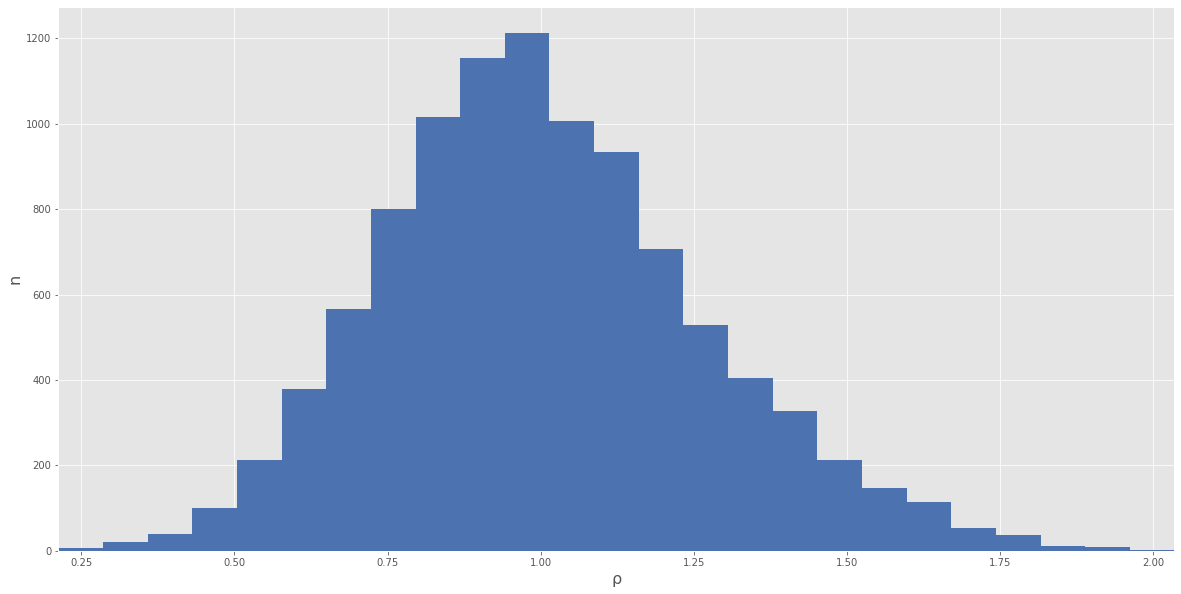

In [46]:
# Распределение спектральных радиусов
matplotlib.style.use('seaborn-deep')
plt.figure(figsize=(20,10))
plt.xlabel(chr(961), fontsize=16)
plt.ylabel('n', fontsize=16)
plt.xlim(data['Ro'].min(), data['Ro'].max())
plt.hist(data['Ro'], bins=25)
plt.savefig('./tridiagonal/Plot_Ro')
plt.show()

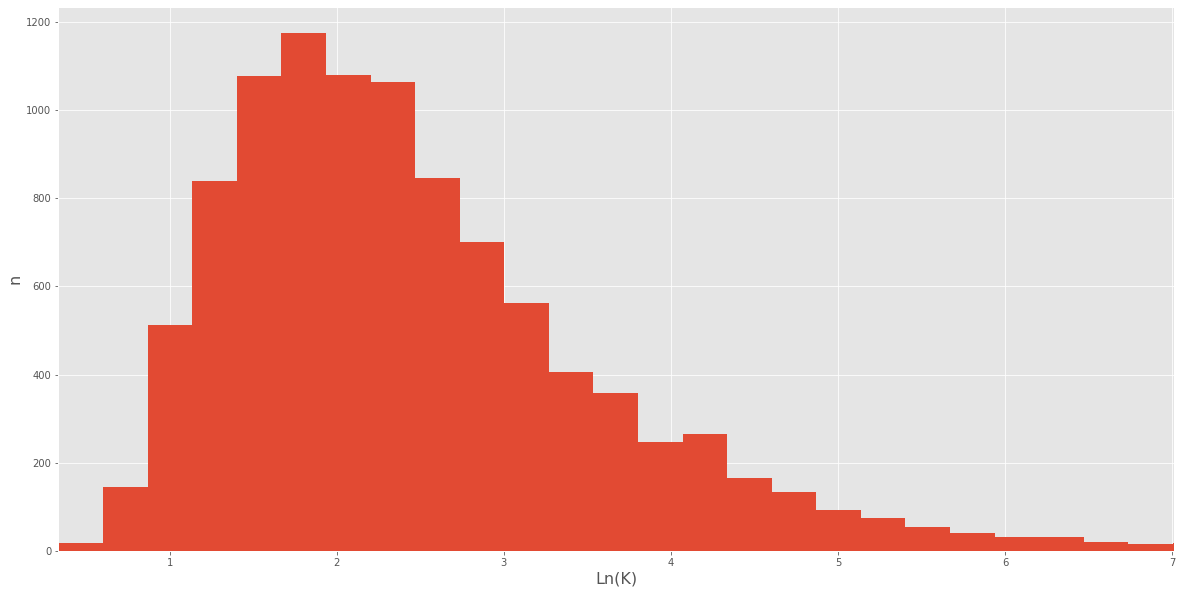

In [47]:
# Распределение чисел обусловленности
matplotlib.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.xlabel('Ln(K)', fontsize=16)
plt.ylabel('n', fontsize=16)
plt.xlim(data['Log_K'].min(), data['Log_K'].quantile(0.995))
plt.hist(data['Log_K'], bins=50)
plt.savefig('./tridiagonal/Plot_K')
plt.show()

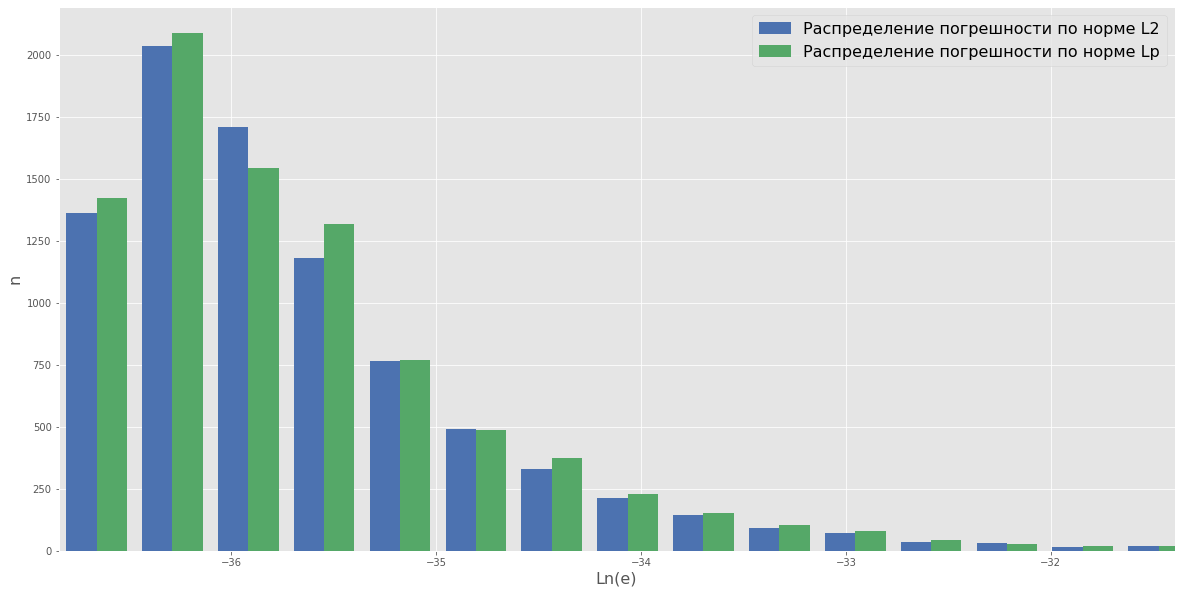

In [48]:
# Распределение погрешностей по среднеквадратичной и супремум-норме
matplotlib.style.use('seaborn-deep')
plt.figure(figsize=(20,10))
plt.xlabel('Ln(e)', fontsize=16)
plt.ylabel('n', fontsize=16)
plt.xlim(data['Log_Ep'].min(), data['Log_Ep'].quantile(0.995))
plt.hist((data['Log_E2'], data['Log_Ep']), bins=30, label = ('Распределение погрешности по норме L2',
                                                             'Распределение погрешности по норме Lp'))                                                     
plt.legend(loc='upper right', fontsize=16)
plt.savefig('./tridiagonal/Plot_E')
plt.show()

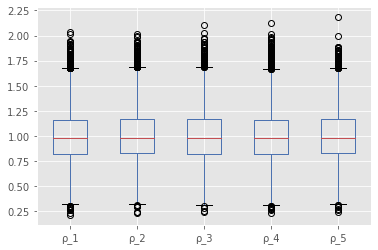

In [49]:
# диаграмма размаха спектрального радиуса для матриц общего вида
data_Ro = pd.DataFrame({chr(961)+'_1': Ro[:,10], 
                        chr(961)+'_2': Ro[:,11], 
                        chr(961)+'_3': Ro[:,12], 
                        chr(961)+'_4': Ro[:,13], 
                        chr(961)+'_5': Ro[:,14]})

ax = data_Ro.boxplot(column=[chr(961)+'_1', 
                             chr(961)+'_2', 
                             chr(961)+'_3', 
                             chr(961)+'_4', 
                             chr(961)+'_5'])

ax.get_figure().suptitle('')
plt.savefig('./tridiagonal/BoxPlot_Ro')
plt.show()

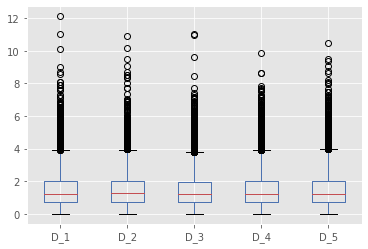

In [50]:
# диаграмма размаха отношения максмального по модулю собственного числа к минимальному для матриц общего вида
data_D = pd.DataFrame({'D_1': np.log(D[:,10]), 
                       'D_2': np.log(D[:,11]), 
                       'D_3': np.log(D[:,12]),
                       'D_4': np.log(D[:,13]), 
                       'D_5': np.log(D[:,14])})

ax = data_D.boxplot(column=['D_1', 
                            'D_2', 
                            'D_3', 
                            'D_4', 
                            'D_5'])

ax.get_figure().suptitle('')
plt.savefig('./tridiagonal/BoxPlot_D')
plt.show()

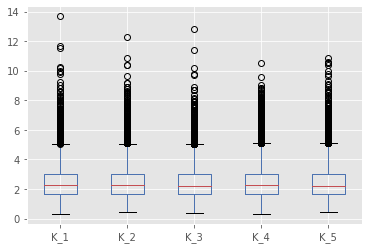

In [51]:
# диаграмма размаха числа обусловленности для матриц общего вида
data_K = pd.DataFrame({'K_1': np.log(K[:,10]),
                       'K_2': np.log(K[:,11]), 
                       'K_3': np.log(K[:,12]),
                       'K_4': np.log(K[:,13]),
                       'K_5': np.log(K[:,14])})

ax = data_K.boxplot(column=['K_1',
                            'K_2', 
                            'K_3', 
                            'K_4',
                            'K_5'])

ax.get_figure().suptitle('')
plt.savefig('./tridiagonal/BoxPlot_K')
plt.show()

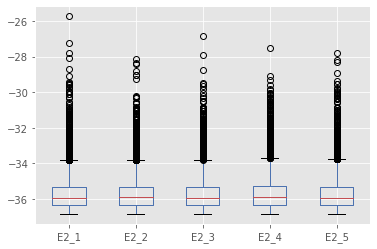

In [52]:
# диаграмма размаха погрешности метода Гаусса (классического) по норме L2 для матриц общего вида
data_E2 = pd.DataFrame({'E2_1': np.log(E2[:,10]),
                        'E2_2': np.log(E2[:,11]), 
                        'E2_3': np.log(E2[:,12]), 
                        'E2_4': np.log(E2[:,13]), 
                        'E2_5': np.log(E2[:,14])})

ax = data_E2.boxplot(column=['E2_1', 
                             'E2_2', 
                             'E2_3', 
                             'E2_4', 
                             'E2_5'])

ax.get_figure().suptitle('')
plt.savefig('./tridiagonal/BoxPlot_E2')
plt.show()

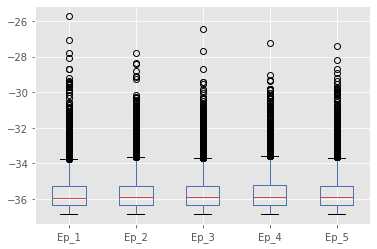

In [53]:
# диаграмма размаха погрешности метода Гаусса (классического) по норме Lp для матриц общего вида
data_Ep = pd.DataFrame({'Ep_1': np.log(Ep[:,10]),
                        'Ep_2': np.log(Ep[:,11]), 
                        'Ep_3': np.log(Ep[:,12]), 
                        'Ep_4': np.log(Ep[:,13]), 
                        'Ep_5': np.log(Ep[:,14])})

ax = data_Ep.boxplot(column=['Ep_1', 
                             'Ep_2', 
                             'Ep_3', 
                             'Ep_4', 
                             'Ep_5'])

ax.get_figure().suptitle('')
plt.savefig('./tridiagonal/BoxPlot_Ep')
plt.show()

### Анализ положительно определённых матриц

In [54]:
for i in range(count):
    A = generator(n, "positive")
    
    x0 = gauss(A, b, True)
    x1 = cholesky(A, b)
    
    Ro[i][15] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][15] = np.linalg.cond(A)
    E2[i][15] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][15] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][15] = Ro[i][15] / np.min(np.abs(np.linalg.eigvals(A)))

In [55]:
def generator_positive(n, a, b):   
    A = np.triu(np.random.uniform(a, b, (n, n)))
    A = A @ np.transpose(A)
        
    return A

In [56]:
for i in range(count):
    A = generator_positive(n, 3, 5)
    
    x0 = gauss(A, b, True)
    x1 = cholesky(A, b)
    
    Ro[i][16] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][16] = np.linalg.cond(A)
    E2[i][16] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][16] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][16] = Ro[i][16] / np.min(np.abs(np.linalg.eigvals(A)))

In [57]:
for i in range(count):
    A = generator_positive(n, -5, -3)
    
    x0 = gauss(A, b, True)
    x1 = cholesky(A, b)
    
    Ro[i][17] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][17] = np.linalg.cond(A)
    E2[i][17] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][17] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][17] = Ro[i][17] / np.min(np.abs(np.linalg.eigvals(A)))

In [58]:
for i in range(count):
    A = generator_positive(n, -4, 4)
    
    x0 = gauss(A, b, True)
    x1 = cholesky(A, b)
    
    Ro[i][18] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][18] = np.linalg.cond(A)
    E2[i][18] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][18] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][18] = Ro[i][18] / np.min(np.abs(np.linalg.eigvals(A)))

In [59]:
for i in range(count):
    A = generator_positive(n, -0.25, 0.25)
    
    x0 = gauss(A, b, True)
    x1 = cholesky(A, b)
    
    Ro[i][19] = np.max(np.abs(np.linalg.eigvals(A)))
    K[i][19] = np.linalg.cond(A)
    E2[i][19] = correct(np.sqrt(np.sum((x1 - x0)**2)) / np.sqrt(np.sum(x0**2)))
    Ep[i][19] = correct(np.max(np.abs(x1 - x0)) / np.max(np.abs(x0)))
    D[i][19] = Ro[i][19] / np.min(np.abs(np.linalg.eigvals(A)))

In [60]:
data = pd.DataFrame({'Ro': Ro[:,15], 'Log_K': np.log(K[:,15]), 'Log_E2': np.log(E2[:,15]), 'Log_Ep': np.log(Ep[:,15])})

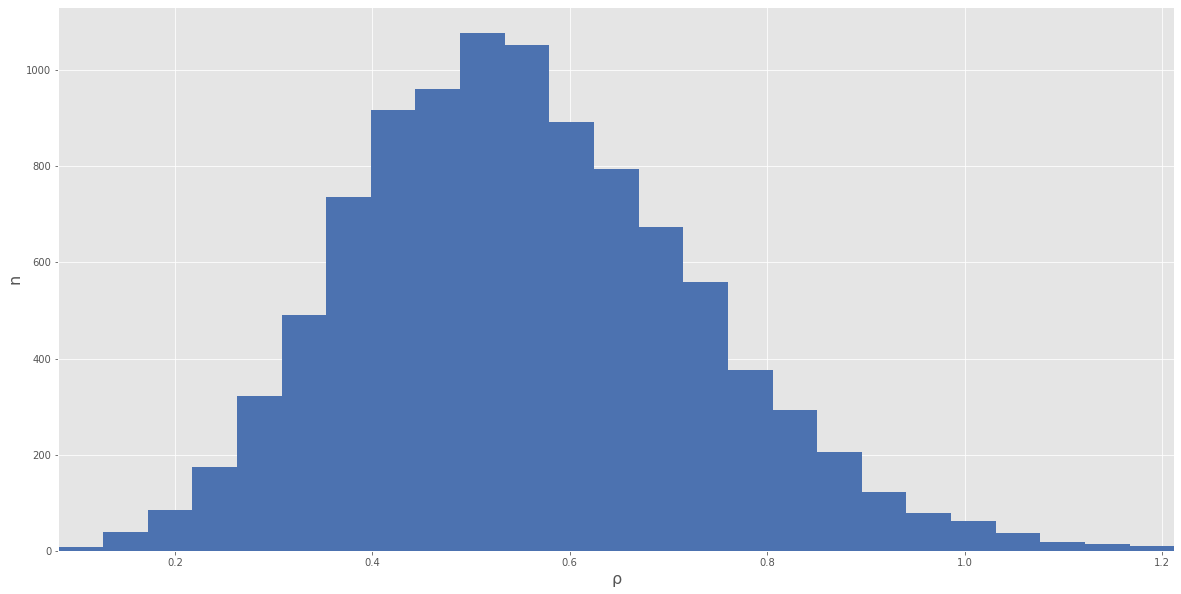

In [61]:
# Распределение спектральных радиусов
matplotlib.style.use('seaborn-deep')
plt.figure(figsize=(20,10))
plt.xlabel(chr(961), fontsize=16)
plt.ylabel('n', fontsize=16)
plt.xlim(data['Ro'].min(), data['Ro'].max())
plt.hist(data['Ro'], bins=25)
plt.savefig('./positive/Plot_Ro')
plt.show()

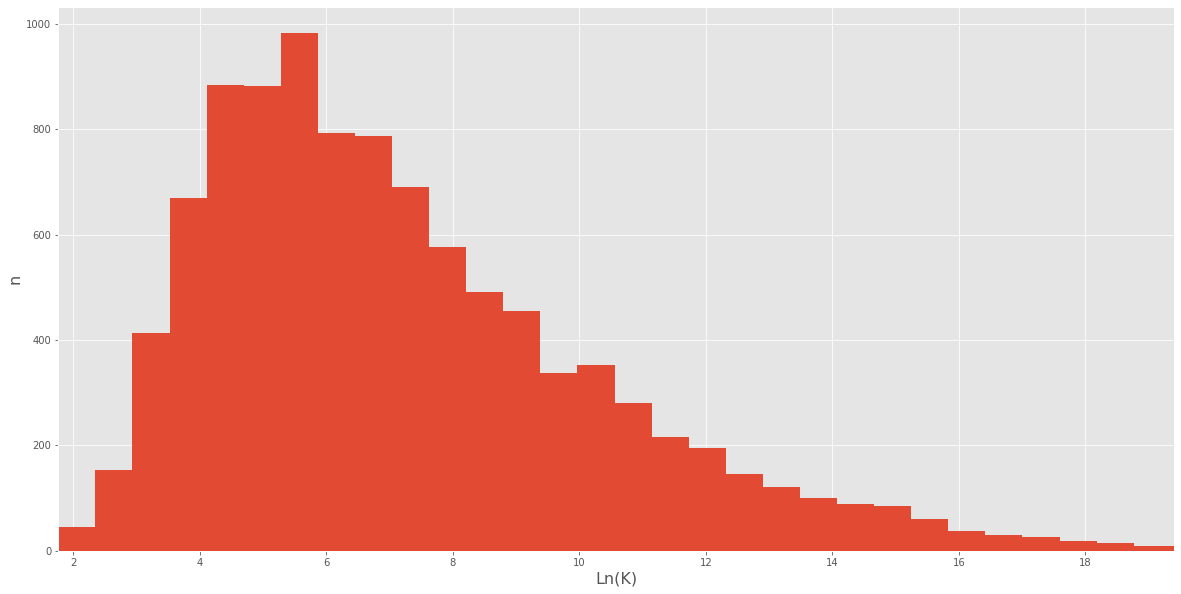

In [62]:
# Распределение чисел обусловленности
matplotlib.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.xlabel('Ln(K)', fontsize=16)
plt.ylabel('n', fontsize=16)
plt.xlim(data['Log_K'].min(), data['Log_K'].quantile(0.995))
plt.hist(data['Log_K'], bins=50)
plt.savefig('./positive/Plot_K')
plt.show()

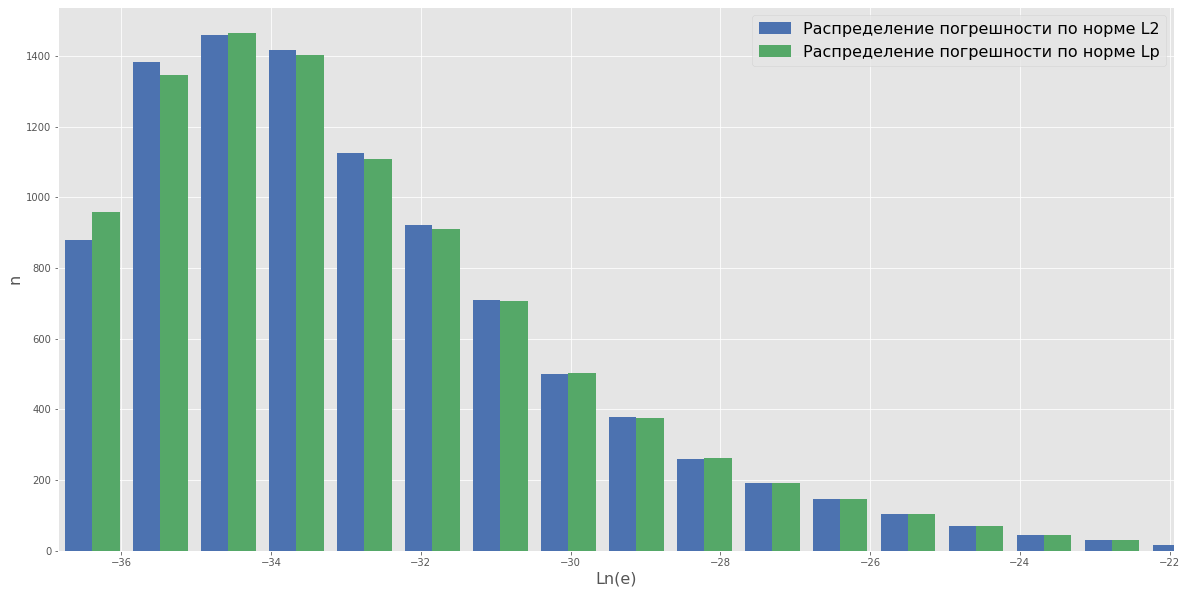

In [63]:
# Распределение погрешностей по среднеквадратичной и супремум-норме
matplotlib.style.use('seaborn-deep')
plt.figure(figsize=(20,10))
plt.xlabel('Ln(e)', fontsize=16)
plt.ylabel('n', fontsize=16)
plt.xlim(data['Log_Ep'].min(), data['Log_Ep'].quantile(0.995))
plt.hist((data['Log_E2'], data['Log_Ep']), bins=30, label = ('Распределение погрешности по норме L2',
                                                             'Распределение погрешности по норме Lp'))                                                     
plt.legend(loc='upper right', fontsize=16)
plt.savefig('./positive/Plot_E')
plt.show()

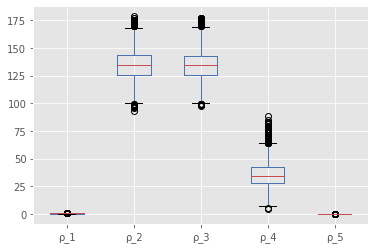

In [64]:
# диаграмма размаха спектрального радиуса для матриц общего вида
data_Ro = pd.DataFrame({chr(961)+'_1': Ro[:,15], 
                        chr(961)+'_2': Ro[:,16], 
                        chr(961)+'_3': Ro[:,17], 
                        chr(961)+'_4': Ro[:,18], 
                        chr(961)+'_5': Ro[:,19]})

ax = data_Ro.boxplot(column=[chr(961)+'_1', 
                             chr(961)+'_2', 
                             chr(961)+'_3', 
                             chr(961)+'_4', 
                             chr(961)+'_5'])

ax.get_figure().suptitle('')
plt.savefig('./positive/BoxPlot_Ro')
plt.show()

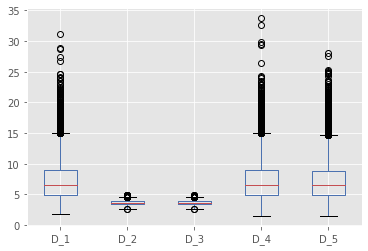

In [65]:
# диаграмма размаха отношения максмального по модулю собственного числа к минимальному для матриц общего вида
data_D = pd.DataFrame({'D_1': np.log(D[:,15]), 
                       'D_2': np.log(D[:,16]), 
                       'D_3': np.log(D[:,17]),
                       'D_4': np.log(D[:,18]), 
                       'D_5': np.log(D[:,19])})

ax = data_D.boxplot(column=['D_1', 
                            'D_2', 
                            'D_3', 
                            'D_4', 
                            'D_5'])

ax.get_figure().suptitle('')
plt.savefig('./positive/BoxPlot_D')
plt.show()

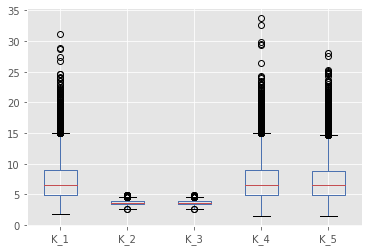

In [66]:
# диаграмма размаха числа обусловленности для матриц общего вида
data_K = pd.DataFrame({'K_1': np.log(K[:,15]),
                       'K_2': np.log(K[:,16]), 
                       'K_3': np.log(K[:,17]),
                       'K_4': np.log(K[:,18]),
                       'K_5': np.log(K[:,19])})

ax = data_K.boxplot(column=['K_1',
                            'K_2', 
                            'K_3', 
                            'K_4',
                            'K_5'])

ax.get_figure().suptitle('')
plt.savefig('./positive/BoxPlot_K')
plt.show()

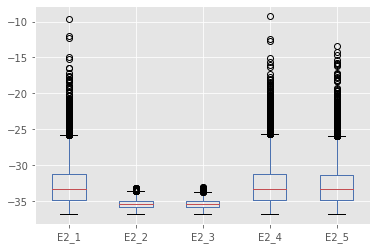

In [67]:
# диаграмма размаха погрешности метода Гаусса (классического) по норме L2 для матриц общего вида
data_E2 = pd.DataFrame({'E2_1': np.log(E2[:,15]),
                        'E2_2': np.log(E2[:,16]), 
                        'E2_3': np.log(E2[:,17]), 
                        'E2_4': np.log(E2[:,18]), 
                        'E2_5': np.log(E2[:,19])})

ax = data_E2.boxplot(column=['E2_1', 
                             'E2_2', 
                             'E2_3', 
                             'E2_4', 
                             'E2_5'])

ax.get_figure().suptitle('')
plt.savefig('./positive/BoxPlot_E2')
plt.show()

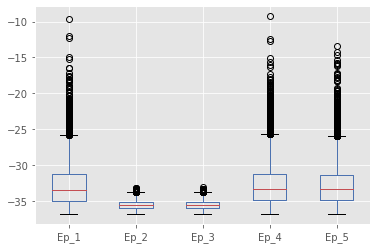

In [68]:
# диаграмма размаха погрешности метода Гаусса (классического) по норме Lp для матриц общего вида
data_Ep = pd.DataFrame({'Ep_1': np.log(Ep[:,15]),
                        'Ep_2': np.log(Ep[:,16]), 
                        'Ep_3': np.log(Ep[:,17]), 
                        'Ep_4': np.log(Ep[:,18]), 
                        'Ep_5': np.log(Ep[:,19])})

ax = data_Ep.boxplot(column=['Ep_1', 
                             'Ep_2', 
                             'Ep_3', 
                             'Ep_4', 
                             'Ep_5'])

ax.get_figure().suptitle('')
plt.savefig('./positive/BoxPlot_Ep')
plt.show()